<a href="https://colab.research.google.com/github/gastan81/supervised-ml/blob/main/02_classification__decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic 2: Decision Trees



#### Pros and Cons, Step-by-step, Example:

1. Pros and Cons
- **Helpful for feature selection**: Can tell us which features are most important for differentiating target classes 🧩.
- **"White box"**: We can see and understand exactly how a decision tree works 🔍.
- **Does automatic feature selection**: Reduces the amount of preprocessing required ⚙️.
- **Struggles with**: Linear relationships, highly correlated features, outliers, highly imbalanced data.

2. How does it work (Step-by-step)
- **Starting Point**: Begin with the entire dataset and choose a feature to split the data based on some criterion
- **Splitting**: Select the feature that best separates classes, then split the data into these classes.
- **Recursion**: Repeat the process for each subset, for all relevant features.
- **Stopping Criteria**:  Recursion stops if *maximum depth* is reached, all samples belong to the *same class* or *no further improvement* can be made.
- **Leaf Nodes**: Assigned to the class that is most common among the samples in that node.


3. Example: Will this customer purchase my luxury watch?
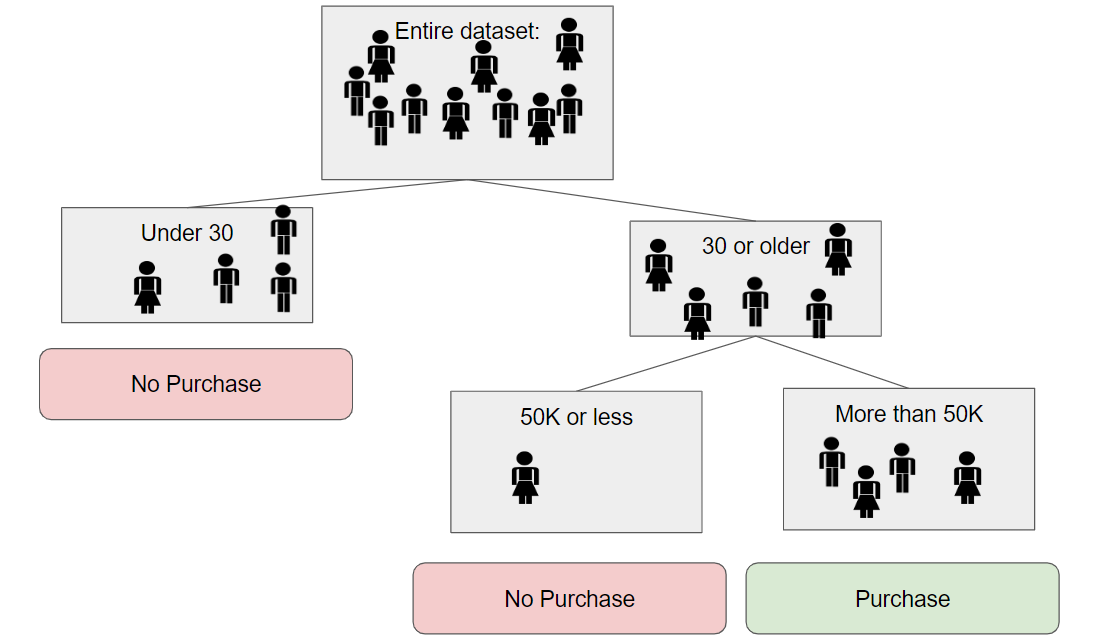

## 1. Read the data

**Dataset variables:**

*   survival -->	Whether a passenger survived or not
*   pclass -->	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   sex -->	Sex
*   Age -->	Age in years
*   sibsp -->	# of siblings / spouses aboard the Titanic
*   parch -->	# of parents / children aboard the Titanic
*   ticket -->	Ticket number
*   fare -->	Passenger fare
*   cabin -->	Cabin number
*   embarked -->	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
import pandas as pd

url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2. Define X and y

In [ ]:
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

## 3. Data Splitting (Train - Test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

## 4. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

ValueError: could not convert string to float: 'male'

**We got an error**: the model cannot deal with categorical features. We will soon learn to encode them as numbers, but our approach should always be to quickly complete the task  first, and iterate to improve it later. This is the reason why we will simply start by dropping the categorical features.

## 5. Select only numerical features


In [ ]:
# another option: X_num = X.drop(columns=["Sex", "Cabin", "Embarked"])
X_num = X.select_dtypes(include="number")

In [ ]:
X_num#.columns

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


### 5.1. Train-test split

Since we created a new dataframe without the categorical features, we need to create our test and train sets again.

In [ ]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

### 5.2. Implement a Decision Tree (numerical features)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_num_train, y=y_train)

DecisionTreeClassifier()

## 6. Dealing with missing data

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with **some** scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. **Most** machine learning algorithms require that their inputs have no missing values, and will not work if this requirement is violated.
For more details on estimators that handle NaN values in the new versions of SK-Learn, take a look here: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import sklearn
sklearn. __version__

'1.3.2'

A basic strategy in order to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.
We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:
- mean (default),
- median,
- most frequent,
- constant.

For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
X_num_train.isna().sum()

,0
Pclass,0
Age,148
SibSp,0
Parch,0
Fare,0


In [ ]:
from sklearn.impute import SimpleImputer

Follow this approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

The **.fit() method** is used to learn parameters from the training data. For example, an imputer learns statistical measures (like mean or median) from the training data to impute missing values.

The **.transform() method** applies the learned transformation (imputation, scaling, etc.) to new data. It does not learn anything new; it simply applies the transformations based on the parameters learned during .fit().

NO DATA SNOOPING! **Do not fit to both train, test and do not transform test before train data.**


In [ ]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [ ]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [ ]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [ ]:
X_num_imputed_train.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

We will implement the 4th step in 7.1.

### 6.1. Implement a Decision Tree (numerical features + missing values imputed)

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier()

### 6.2. Make predictions and check accuracy on the train set

In [ ]:
# make predictions
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

**.predict() method**: you pass in the input data (X_num_imputed_train) for which you want to predict the target variable (or class labels).


In [ ]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.9564606741573034

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## 7. Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [ ]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

### 7.2. Make predictions on the test set

In [ ]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

### 7.3. Check accuracy score on the test set

In [ ]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.6536312849162011

This accuracy is even lower than some of our intuition-based models...

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

## 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

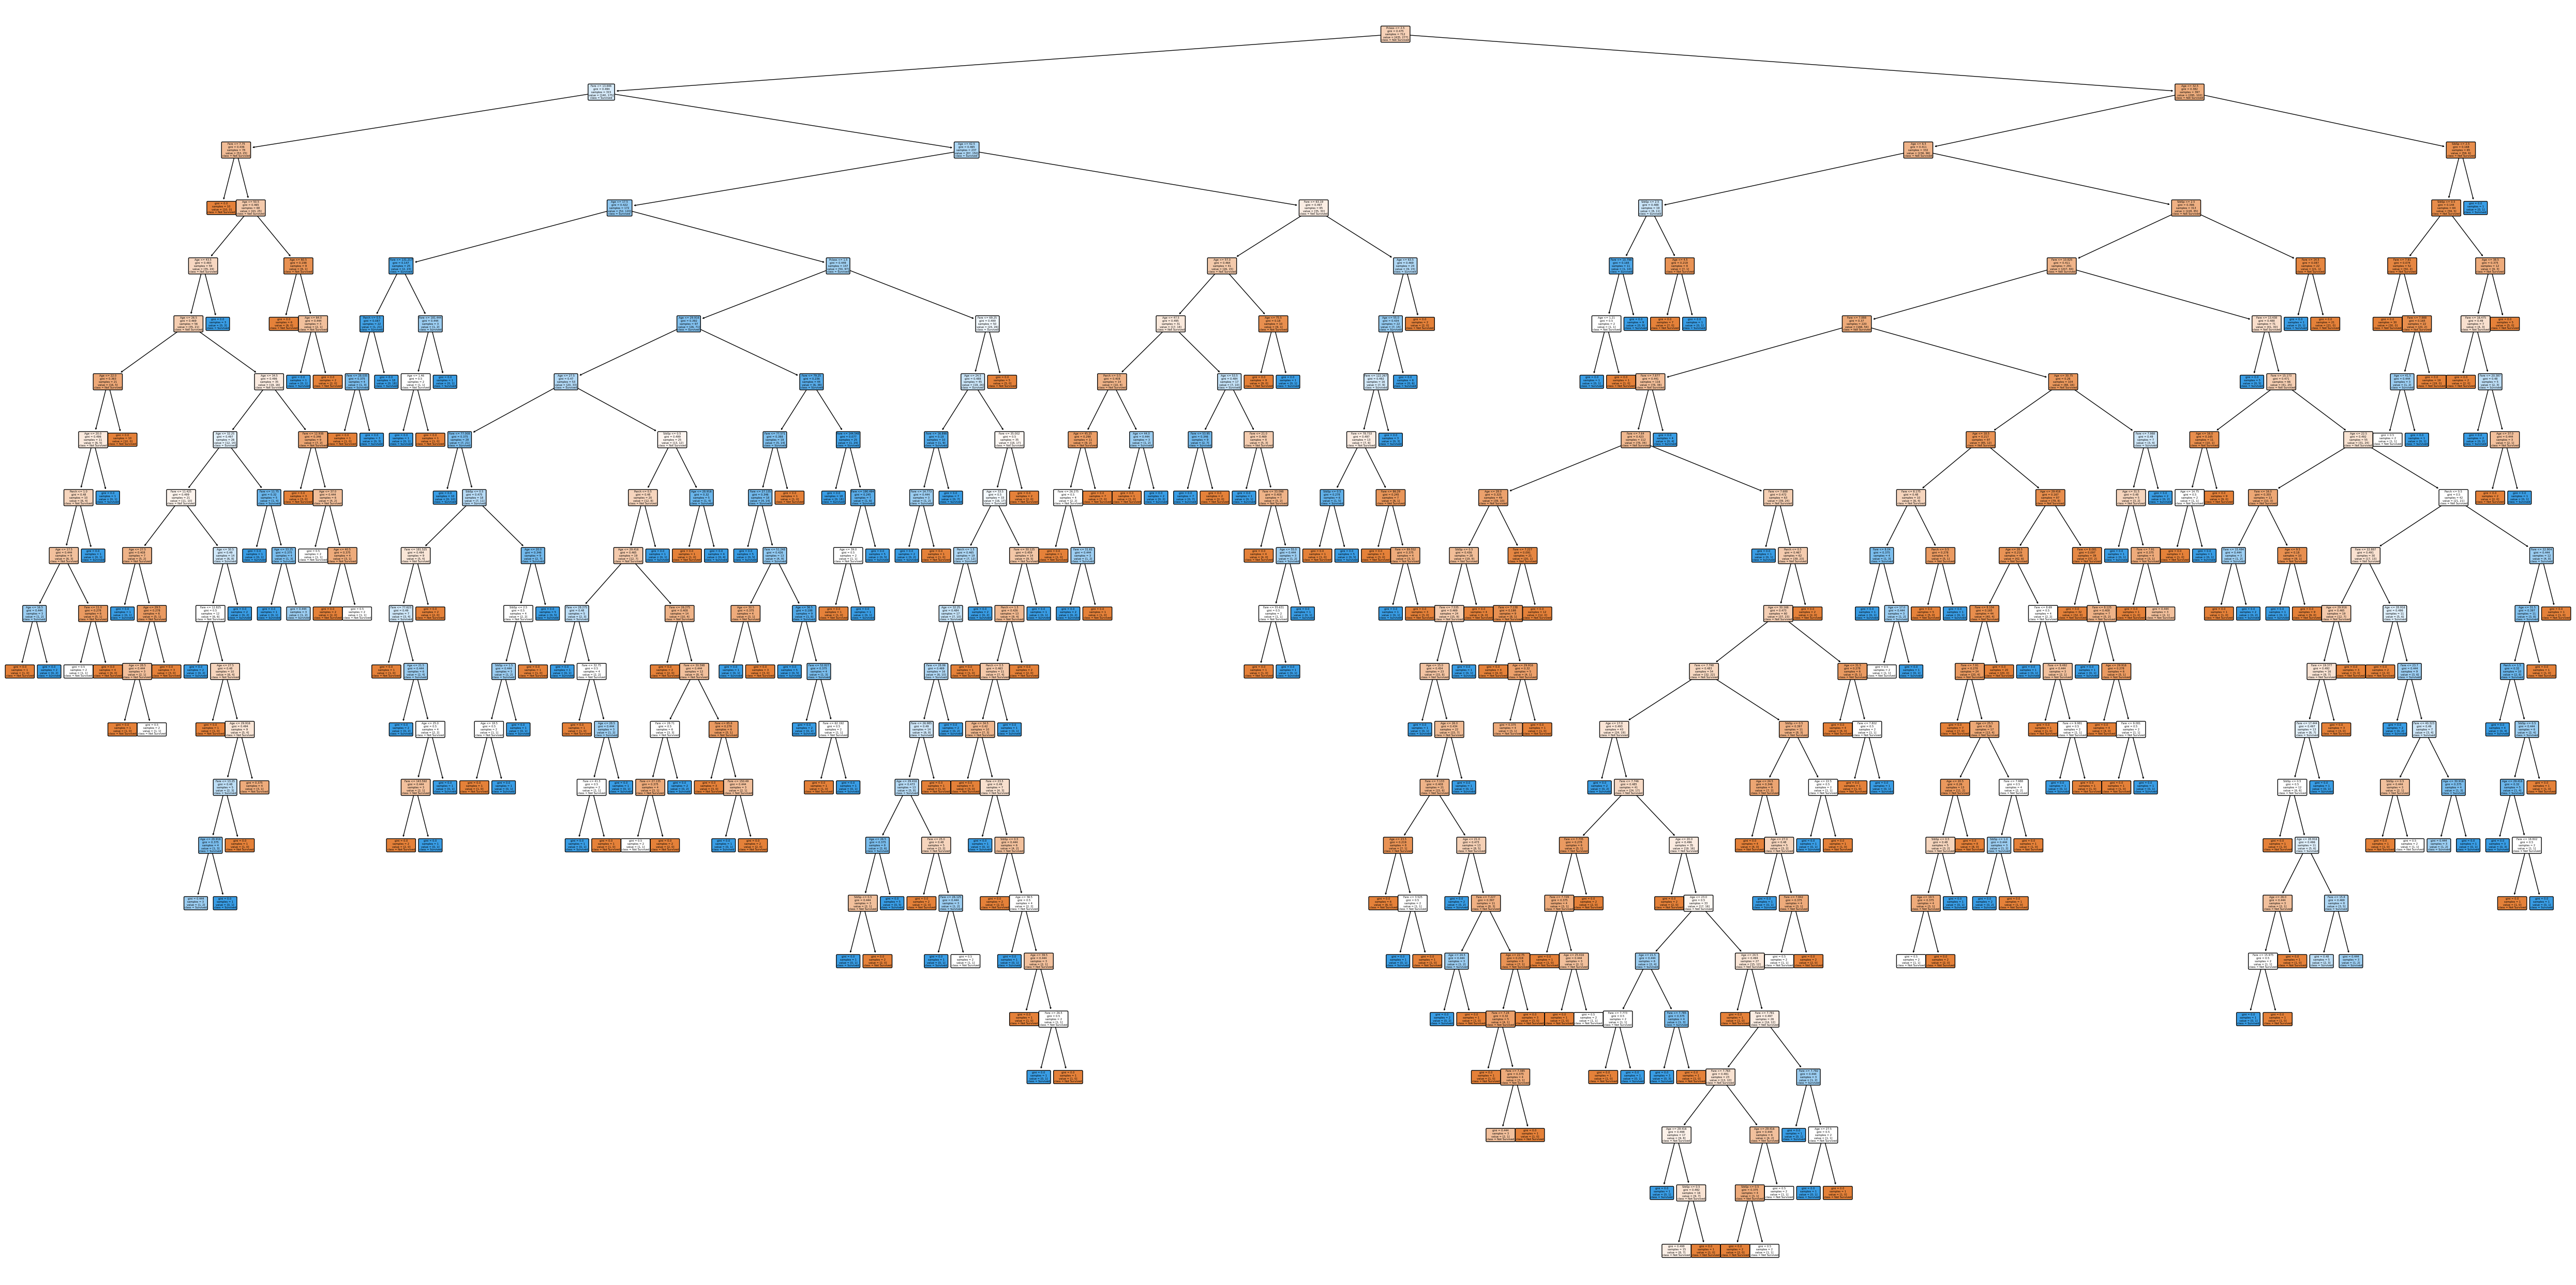

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    my_tree,                          # Decision tree model to visualize
    filled=True,                      # Whether to fill nodes with colors based on majority class
    rounded=True,                     # Whether to round the corners of the nodes
    class_names=['Not Survived','Survived'],  # Names of the classes for the target variable
    feature_names=X_num.columns       # Names of the features (columns) in your dataset
);


Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### **Exercise 1**: Pruning the tree

1. Tweak the parameters `max_depth` and `min_samples_leaf` of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
2. Try to make the tree smaller.
3. Visualize again the tree.
4. Check the performance of your "small tree" on the train & test sets.

Major hyperparameters:

- **max_depth**: Limits the size of the decision tree. Larger numbers lead to overfitting. A range of **2-15** is reasonable depending on the complexity of the problem and the number of features in the dataset. It can be more if the problem is highly complex.
- **min_samples_leaf**: Requires that any pattern apply to at least this many points in the training data. Higher numbers reduce overfitting. The range should be based on the size and diversity of the dataset. Try a range from **5-30** or so.
- **criterion**: Determines how the algorithm evaluates the best splits to make at each decision node. Try all three.
- **min_impurity_decrease**: Sets the standard for how effective a split must be, limiting the complexity of the model and reducing overfitting when the number is higher. A reasonable range can be from **0 to 0.5** but should generally be closer to **0.1**.
- **ccp_alpha**: Prunes the completed decision tree, removing parts that increase complexity without significantly improving purity. A reasonable range is from **0 to 0.1**.

In [ ]:
# your code here

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project.